# Figure 3
INP concentrations, normalised by the number, surface area and volume of aerosol > 100 nm.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [2]:
INP_concentrations = pd.read_csv('/home/users/erinraif/acao_data/inp_data/subtracted_backgrounds_v4_2ul.csv', index_col='temp_bin')
nX_data = pd.read_csv('/home/users/erinraif/acao_data/inp_data/nX_calibrated_v3.csv',index_col='temp_bin')
leg_types = pd.read_csv('/home/users/erinraif/acao_data/metadata/filter_leg_types.csv',
                        index_col='unique_ID')
suffixes = ['nN','nS','nV']

In [3]:
default_colors = mcolors.TABLEAU_COLORS
colors = list(default_colors.keys())
lines=['solid','dotted',(0,(5,1))]

In [4]:
def get_linestyle(count, colors, lines):
    # function ensures that (consistent) different linestyles are maintained
    c = colors[count % len(colors)]
    ls = lines[count // len(colors)]
    return ls, c

In [5]:
mosaic = [['INP_ax','INP_ax','nN_ax','nN_ax'],
          ['INP_ax','INP_ax','nN_ax','nN_ax'],
          ['nS_ax','nS_ax','nV_ax','nV_ax'],
          ['nS_ax','nS_ax','nV_ax','nV_ax'],
          ['dummy','dummy','dummy','dummy']]

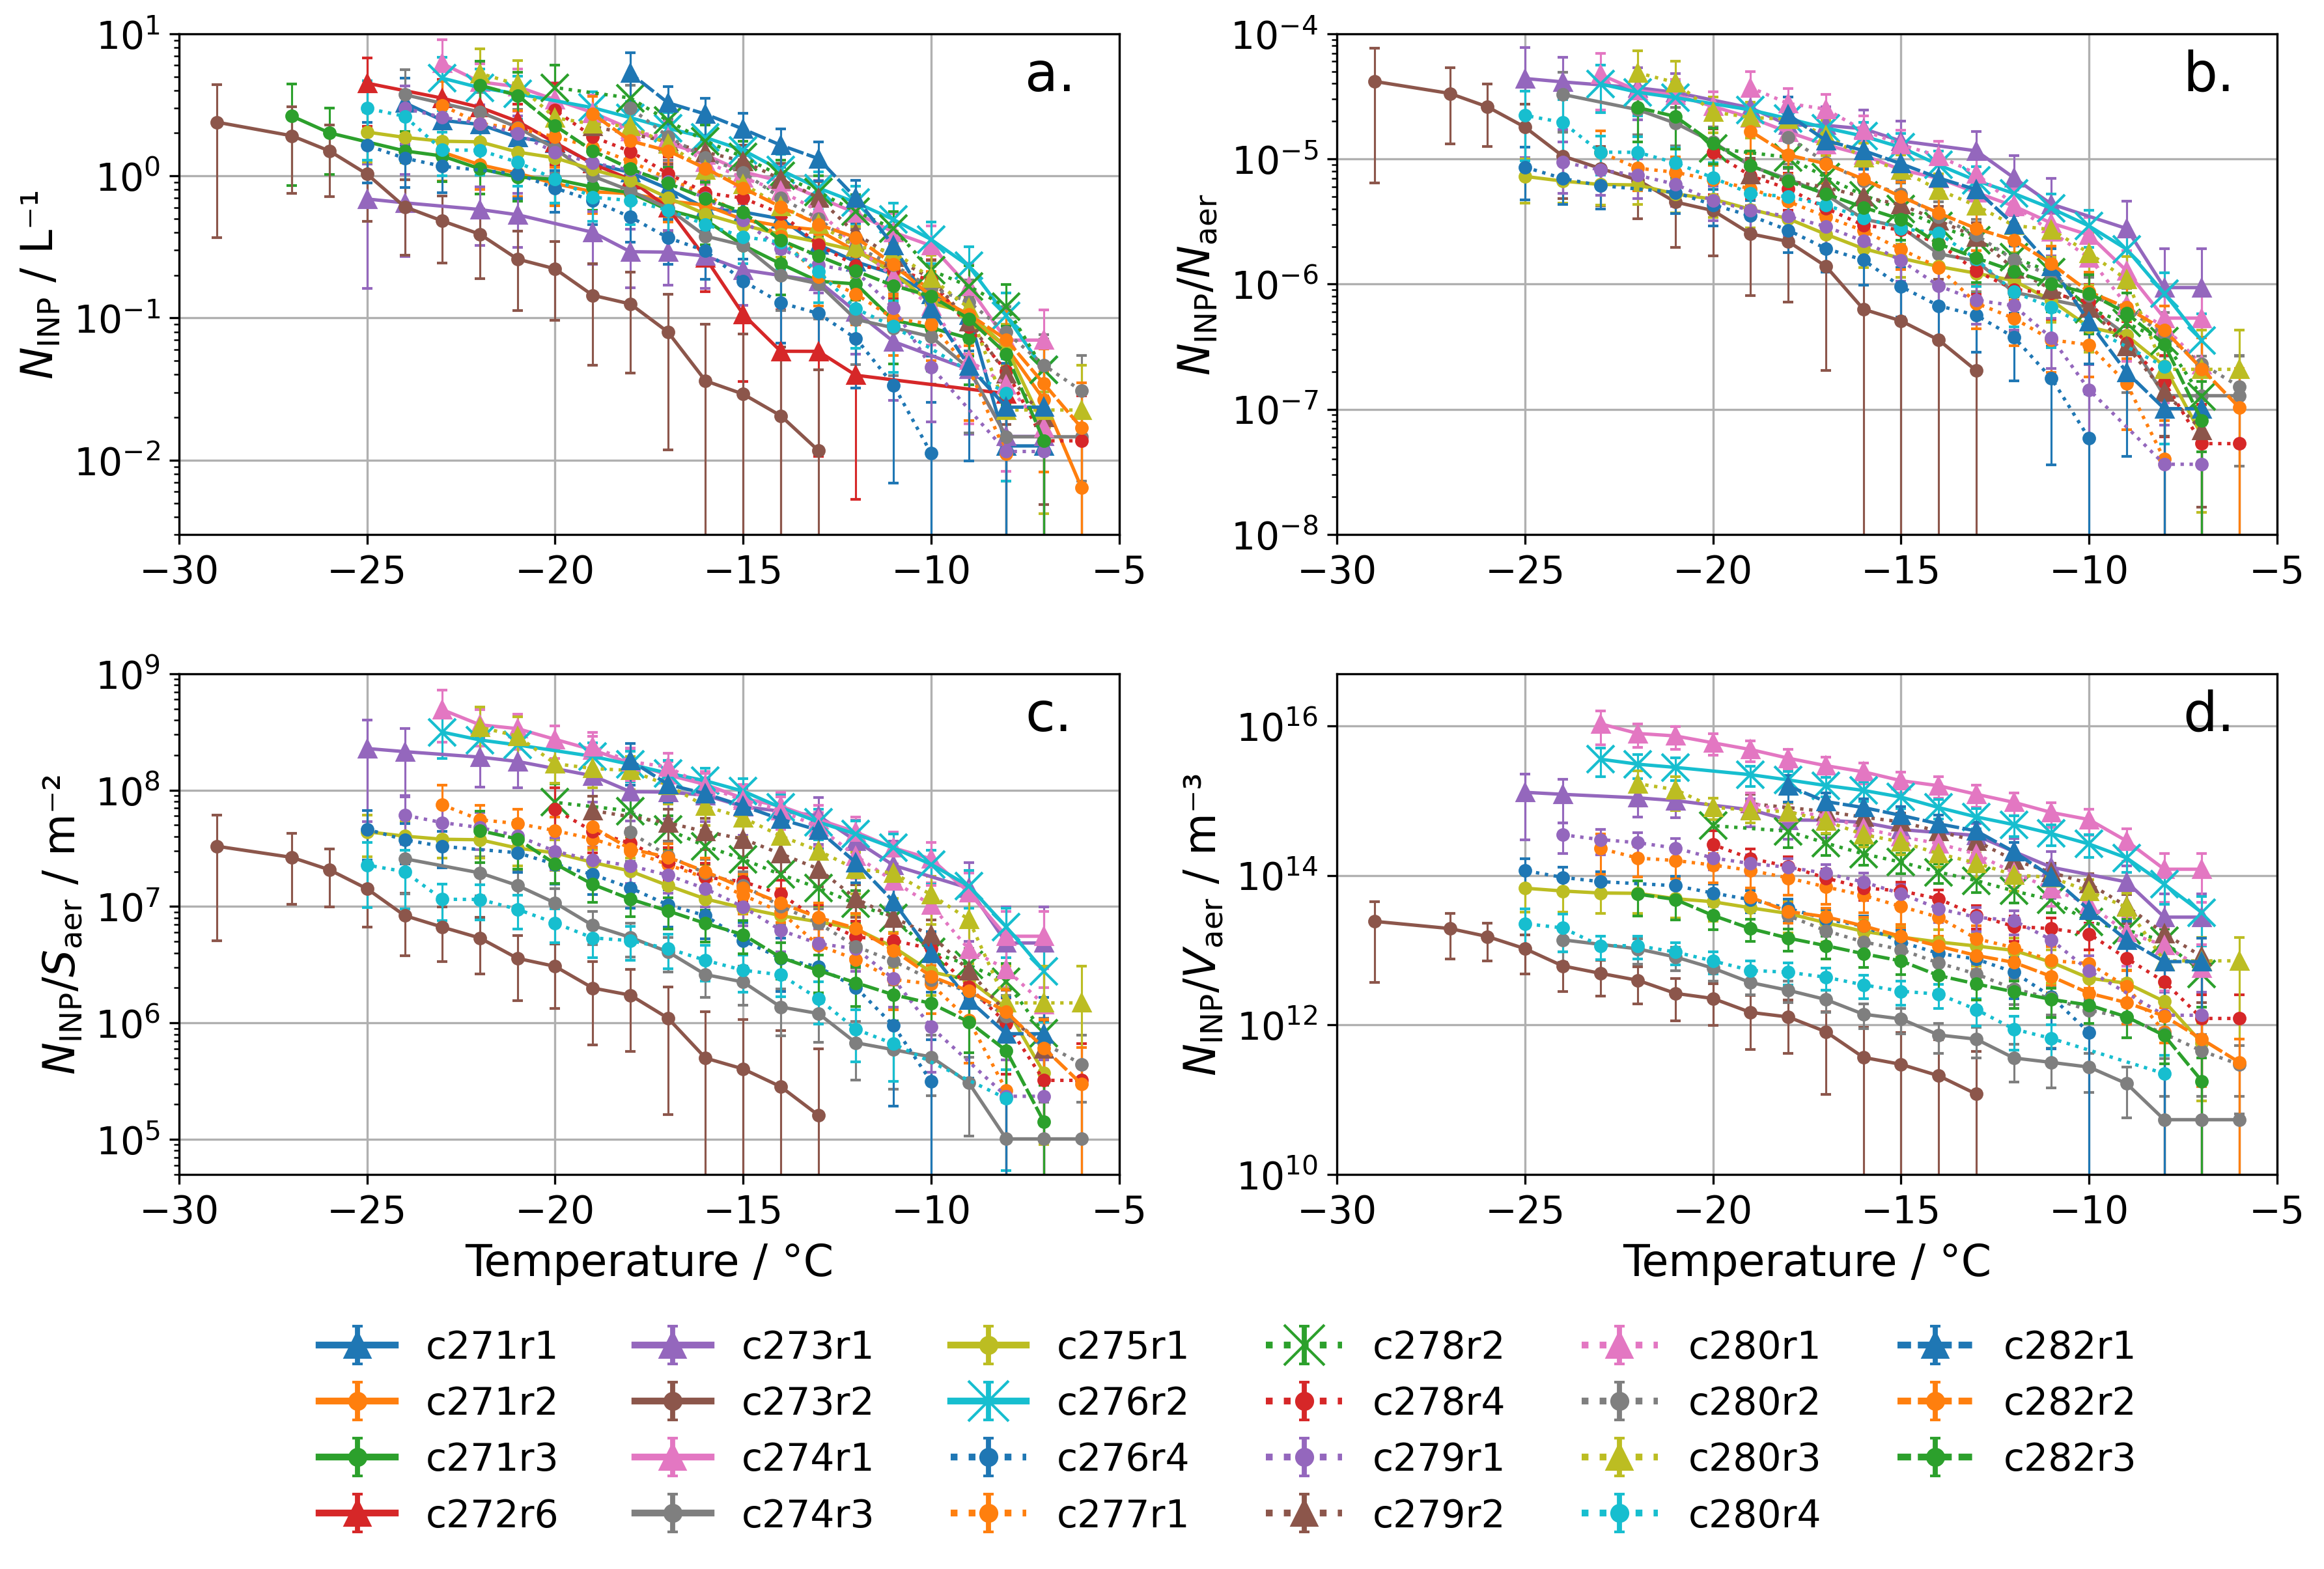

In [6]:
fig, axes = plt.subplot_mosaic(mosaic,figsize=(12,8),dpi=300)
for ax in axes:
    axes[ax].set_xlim(-30,-5)
    axes[ax].set_yscale('log')
    axes[ax].grid()
    axes[ax].tick_params(axis='x', labelsize=14) 
    axes[ax].tick_params(axis='y', labelsize=14)
axes['dummy'].set_yscale('linear')

line_count = 0
# Loop through concentrations and ensure that there is a different style for
# each of the filter measurements.
for col in [col for col in INP_concentrations.columns if col.endswith('NT')]:
    y = INP_concentrations[col]
    y_err = INP_concentrations[col[:-2] + 'err']
    # Choose marker for above/below/upstream
    if leg_types.loc[col[:-3]]['type'] == 'below':
        m = 'o'
        ms = 4
    elif leg_types.loc[col[:-3]]['type'] == 'above':
        m = '^'
        ms = 6
    elif leg_types.loc[col[:-3]]['type'] == 'upstream':
        m = 'x'
        ms = 10
    ls, c = get_linestyle(line_count, colors, lines)
    line_count += 1
    # Plot INP concentrations
    axes['INP_ax'].errorbar(y.dropna().index, y.dropna(), y_err.dropna(), marker=m,
            linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
            linewidth=1.25, color=c)
    # Add linestyle to the dummy axis in the form of an invisible line
    if ls == (0,(5,1)):
        axes['dummy'].errorbar([0],[0], [0.5],marker=m,
            linestyle=(0,(2,1)), markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
            linewidth=1.25*2, color=c, label=col[:-4])
    else:
        axes['dummy'].errorbar([0],[0], [0.5],marker=m,
            linestyle=ls, markersize=ms*1.5, capsize=2, elinewidth=0.75*2.5,
            linewidth=1.25*2, color=c, label=col[:-4])
    # Add data for normalised INP concentrations
    for (ax,s) in zip([axes['nN_ax'],axes['nS_ax'],axes['nV_ax']],suffixes):
        if col > 'c273':
            y = nX_data[col[:-2] + s]
            y_errs = nX_data[col[:-2] + s + '_err']
            ax.errorbar(y.dropna().index, y.dropna(), y_errs.dropna(),marker=m,
                linestyle=ls, markersize=ms, capsize=2, elinewidth=0.75,
                linewidth=1.25, color=c)

# Set axes labels
axes['INP_ax'].set_ylabel(r'$N_\mathrm{INP}$ / L⁻¹', size=16)
axes['nN_ax'].set_ylabel('$N_\mathrm{INP}/N_\mathrm{aer}$',fontsize=16)
axes['nS_ax'].set_ylabel('$N_\mathrm{INP}/S_\mathrm{aer}$ / m⁻²',fontsize=16)
axes['nV_ax'].set_ylabel('$N_\mathrm{INP}/V_\mathrm{aer}$ / m⁻³',fontsize=16)
axes['nS_ax'].set_xlabel('Temperature / °C', fontsize=16)
axes['nV_ax'].set_xlabel('Temperature / °C', fontsize=16)   

# Turn dummy axes visibility off and add legend
axes['dummy'].spines['top'].set_visible(False)
axes['dummy'].spines['right'].set_visible(False)
axes['dummy'].spines['bottom'].set_visible(False)
axes['dummy'].spines['left'].set_visible(False)
axes['dummy'].tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False)
axes['dummy'].grid(False)
axes['dummy'].set_xlim(1,2)
axes['dummy'].set_ylim(1,2)
axes['dummy'].legend(ncols=6, fontsize=14,loc='upper center',frameon=False,borderaxespad=0)
             #bbox_to_anchor=(0.02,1))

# Add sub-figure labels
axes['INP_ax'].text(0.90, 0.97, 'a.', ha='left', va='top', fontsize=20,
           transform=axes['INP_ax'].transAxes)
axes['nN_ax'].text(0.90, 0.97, 'b.', ha='left', va='top', fontsize=20,
           transform=axes['nN_ax'].transAxes)
axes['nS_ax'].text(0.90, 0.97, 'c.', ha='left', va='top', fontsize=20,
           transform=axes['nS_ax'].transAxes)
axes['nV_ax'].text(0.90, 0.97, 'd.', ha='left', va='top', fontsize=20,
           transform=axes['nV_ax'].transAxes)

# Set axes limits
axes['INP_ax'].set_ylim(3e-3, 10)
axes['nN_ax'].set_ylim(1e-8, 1e-4)
axes['nS_ax'].set_ylim(5e4, 1e9)
axes['nV_ax'].set_ylim(1e10, 5e16)

fig.tight_layout()
#fig.savefig('./imgs/f03.pdf', transparent=True)
